In [4]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
from util import TwoCropTransform

In [2]:
def set_loader():
    # construct data loader
    # for animasl10 160to300
    mean = (0.3890, 0.3757, 0.3122)
    std = (0.3279, 0.3201, 0.3073)
    normalize = transforms.Normalize(mean=mean, std=std)

    train_transform = transforms.Compose([
        transforms.RandomResizedCrop(size=300, scale=(0.2, 1.)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomApply([
            transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)
        ], p=0.8),
        transforms.RandomGrayscale(p=0.2),
        transforms.ToTensor(),
        normalize,
    ])

    train_dataset = datasets.ImageFolder(root="./datasets/animals10_300x300/train/",
                                         transform=TwoCropTransform(train_transform))
    
    train_sampler = None
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=4, shuffle=(train_sampler is None),
        num_workers=4, pin_memory=True, sampler=train_sampler)

    return train_loader


def plot_batch(train_loader):

    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12,20))
    fig.tight_layout(pad=0)

    for idx, (images, labels) in enumerate(train_loader):
        print(labels)
        for i, t_images in enumerate(images):
            for j, image in enumerate(t_images):
                im_min = image.min()
                im2 = image - im_min
                im3 = im2 / im2.max()
                im4 = torch.stack((im3[0,:,:],im3[1,:,:],im3[2,:,:]),dim=2)
                axs[j,i].imshow(im4)
                axs[j,i].set_title(f"{labels[j]}")
                axs[j,i].set_axis_off()
        break

In [5]:
train_loader = set_loader()

tensor([3, 6, 8, 9])


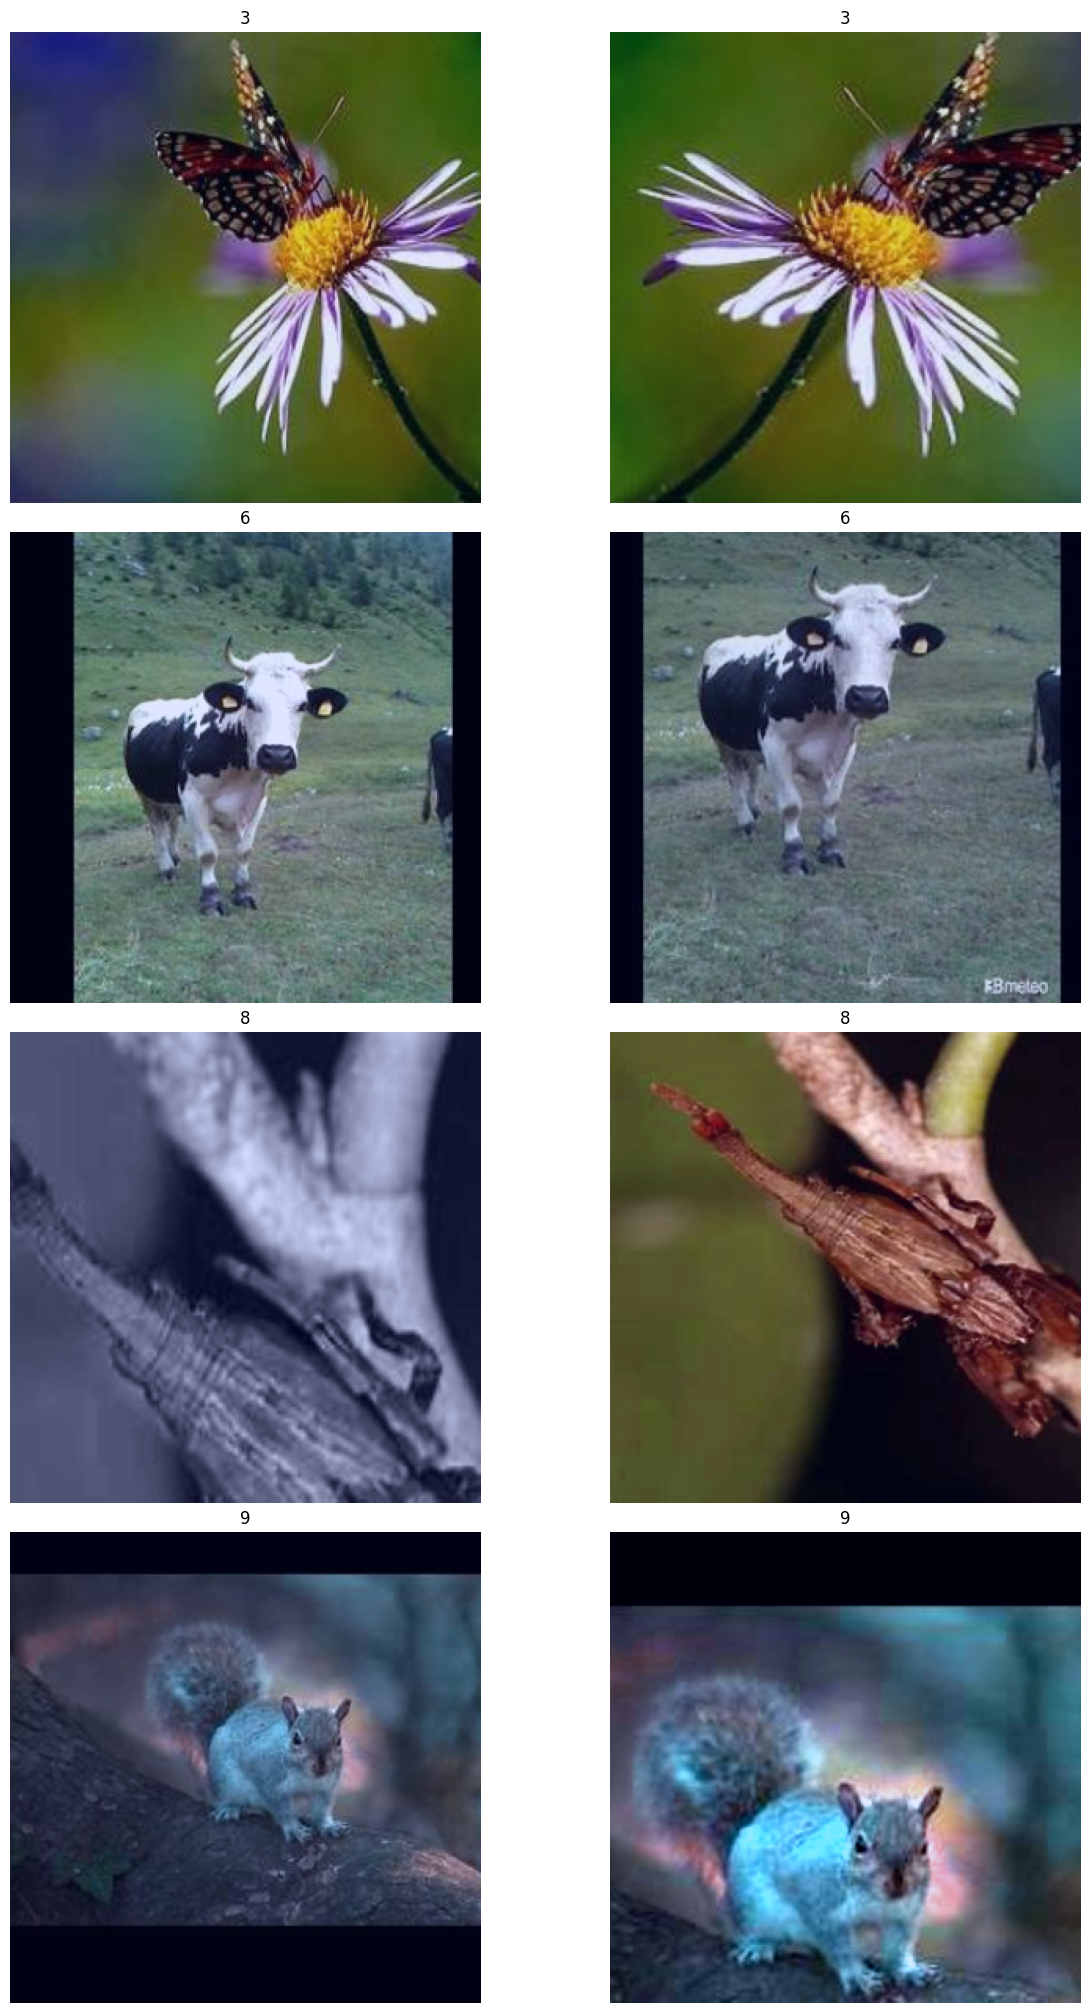

In [6]:
plot_batch(train_loader)